# Summary RL Results

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
print ("Packages loaded")

Packages loaded


### Specify logger paths

In [6]:
sac_path = '../report/log/sac_adt_cont_04/log_Aug-19-2020-08:44:55.txt'
ppo_path = '../report/log/ppo_adt_cont/log_Aug-19-2020-08:15:07.txt'
ars_path = '../report/log/ars_adt_cont/log_Aug-23-2020-04:13:37.txt'
print ("Ready.")

Ready.


In [7]:
def moving_average(x,n=3):
    return np.convolve(x,np.ones((n,))/n,mode='valid')

def parse_rl_result(txt_path):
    f = open(txt_path,mode='r')
    lines = f.readlines()
    secs,ret_evals = [],[]
    for line in lines:
        sec = float(line.split(sep=',')[0])
        r_train = float((line.split(sep=',')[1]).split(sep=':')[1])
        ret_eval = float(((line.split(sep=',')[2]).split(sep=':')[1]).replace('\n',''))
        secs.append(sec)
        ret_evals.append(ret_eval)
        # print ("sec:[%.2e] r_train:[%.2f] ret_eval:[%.2f]"%(sec,r_train,ret_eval))
    return np.asarray(secs),np.asarray(ret_evals)


### Plot results

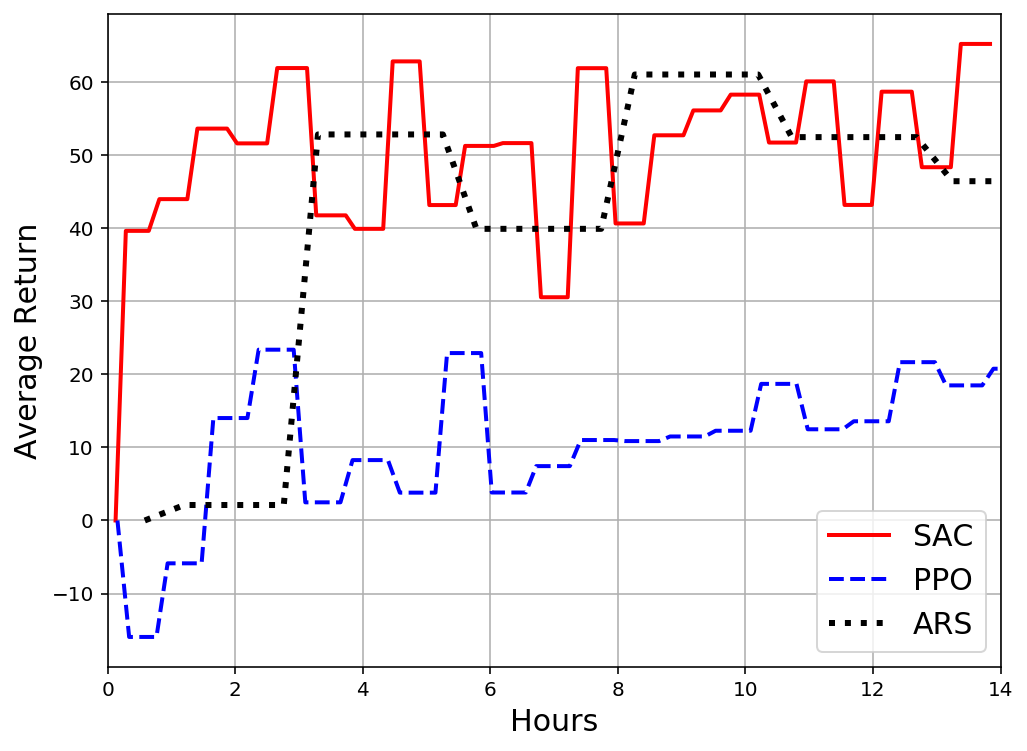

In [21]:
# Parse and moving average
secs_sac,ret_evals_sac = parse_rl_result(sac_path)
secs_ppo,ret_evals_ppo = parse_rl_result(ppo_path)
secs_ars,ret_evals_ars = parse_rl_result(ars_path)

# Trim
secs_sac,ret_evals_sac = secs_sac[:115],ret_evals_sac[:115]
secs_ppo,ret_evals_ppo = secs_ppo[:100],ret_evals_ppo[:100]
secs_ars,ret_evals_ars = secs_ars[:28],ret_evals_ars[:28]

# Plot
plt.figure(figsize=(8,6))
plt.plot(secs_sac/3600,ret_evals_sac,'r-',label='SAC',lw=2)
plt.plot(secs_ppo/3600,ret_evals_ppo,'b--',label='PPO',lw=2)
plt.plot(secs_ars/3600,ret_evals_ars,'k:',label='ARS',lw=3)
plt.xlim([0,14])
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Average Return',fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()